# Problem Statement:

\begin{equation} H_{0} : p_{gate30} - p_{gate40} >= 0 \end{equation}

\begin{equation} H_{1} : p_{gate30} - p_{gate40} < 0 \end{equation}

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

## Read & Understand the data

In [3]:
### Your Code Here ###
df = pd.read_csv('cookie_cats.csv')
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [4]:
df.shape

(90189, 5)

In [5]:
df.isnull().any().sum()

0

In [6]:
df.userid.duplicated().sum()

0

### How many player in each group?

##### Hint: Use groupby with count

In [7]:
### Your Code Here ###
df.groupby('version').count()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,44700,44700,44700,44700
gate_40,45489,45489,45489,45489


### What is the percentage of users that came back the day after they installed?

In [8]:
### Your Code Here ###
df.retention_1.mean()

0.4452095044850259

### What is the percentage of users of each group [gate_30, gate_40] that came back the day after they installed?


In [9]:
### Your Code Here ###
gate_30 = df.query("version == 'gate_30'").retention_1.mean()
gate_40 = df.query("version == 'gate_40'").retention_1.mean()
gate_30, gate_40

obs_sample = gate_30 - gate_40
obs_sample

0.005905169787341458

### Bootstrap the data by resampling the dataset with replacement for retention_1

##### Hint:  use .sample method with frac = 1 and replace = True
##### Hint:  groupby the result of sampling by version column then select retention_1 column and apply mean as an agg function
##### Hint: take difference in mean between the 2 groups in each iteration and append it to a list

In [10]:
df_30 = df.query("version == 'gate_30'")
df_40 = df.query("version == 'gate_40'")

In [11]:
### Your Code Here ###
diffs = []
for _ in range(10000):
    sample_30 = np.random.choice([0,1],df_30.shape[0], p = [1-gate_30, gate_30])
    sample_40 = np.random.choice([0,1],df_40.shape[0], p = [1-gate_40, gate_40])
    diff = sample_30.mean() - sample_40.mean()
    diffs.append(diff)
    

### Plot the difference distribution 

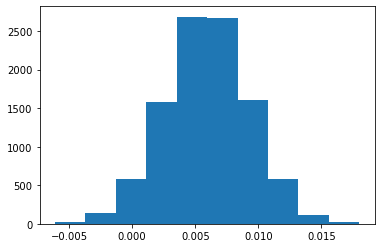

In [12]:
### Your Code Here ###
plt.hist(diffs);

### At alpha level 0.05, should we reject the null ?
##### Hint: Calculate the STDerr, Simulate under the null, Calculate the p-value

In [13]:
diffs = np.array(diffs)

In [14]:
### Your Code Here ###
under_null = np.random.normal(0, diffs.std(), 10000)

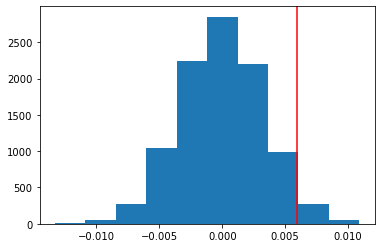

In [15]:
### Your Code Here ###
plt.hist(under_null)
plt.axvline(x= obs_sample, color = 'r');

In [16]:
P_value = (under_null < obs_sample).mean()
P_value

0.9653

**Since P_Value is (0.9648) > alpha (0.05), So we Fail to Reject the Null Hypothesis.**